# Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from functools import partial
from scipy.optimize import fmin
import torch

from indentation.indentationset import IndentationSet
from indentation.processing.find_contact import findContact_minimum, findContact_blackMagic, findContact_blackMagic_CNN
from indentation.processing.signal import do_nothing
from indentation.processing.calculate_parameters import parameter_youngs_modulus
from indentation.processing.plotting import plot_curve_parameters_bar, plot_instance_parameters_bar, plot_mean_force_curves
from indentation.ml.models import ConvClassifier_1, ConvClassifier_2

In [3]:
experiment_paths = [r"example_data/data_evelyn/20241021_PDMS_75t1_PG_4_G_3"]
indentation_set1 = IndentationSet(experiment_paths, exp_type="ft")

# Define processing pipeline: chain processing functions after eachother. 
# Be aware that some require others to run first to work. check/extend processing.py
processing_pipeline2 = [partial(findContact_blackMagic, N_int=1000, padding_fraction=0.02)]

# Process all curves in the measurement set
indentation_set1.process_raw(processing_pipeline2)

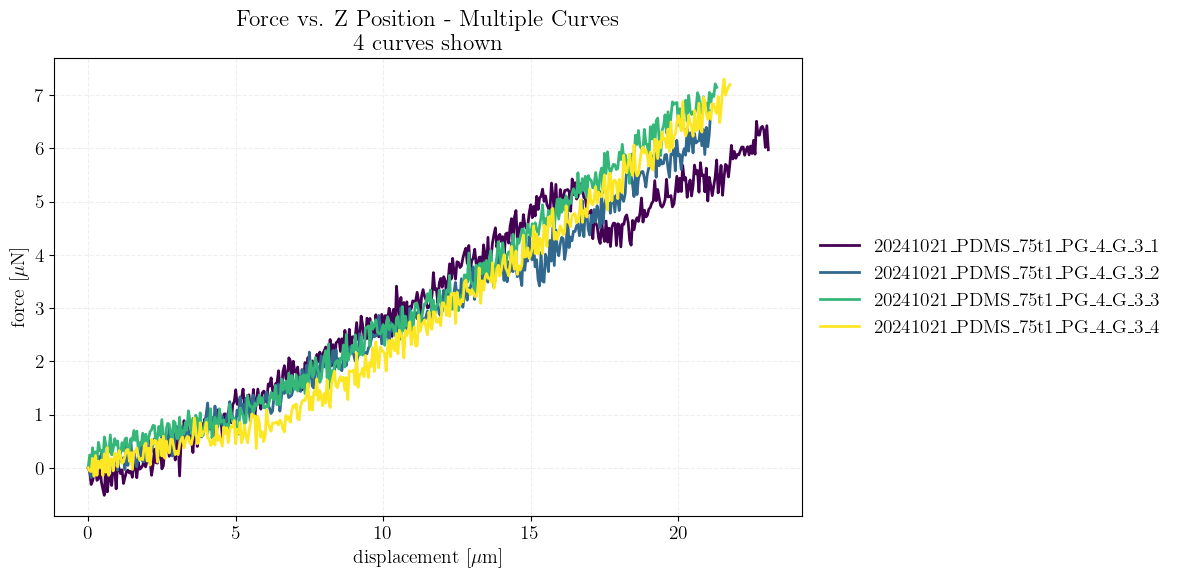

(<Figure size 1200x600 with 1 Axes>,
 <Axes: title={'center': 'Force vs. Z Position - Multiple Curves\n4 curves shown'}, xlabel='displacement [$\\mu$m]', ylabel='force [$\\mu$N]'>)

In [4]:
indentation_set1.plot_all()

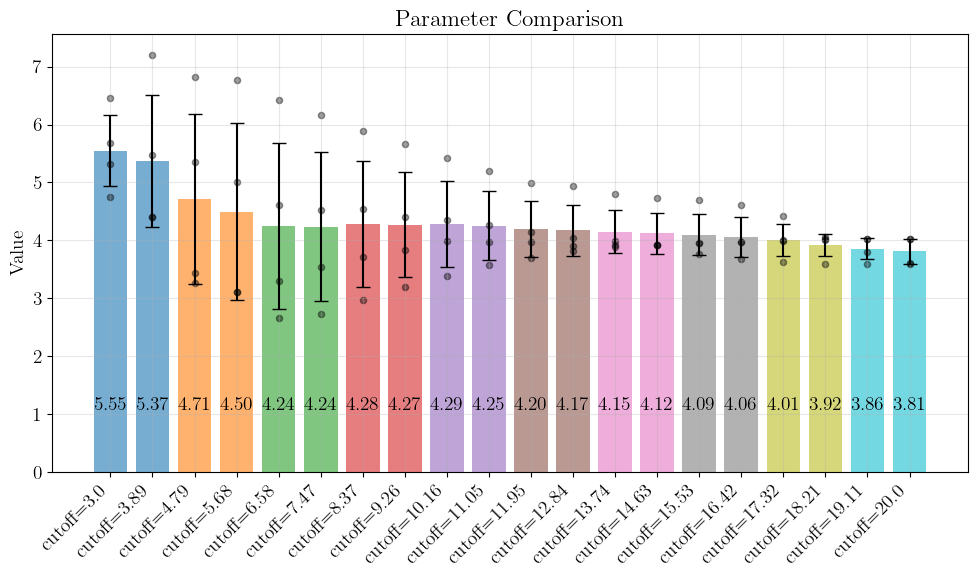

In [6]:
cutoffs = np.linspace(3, 20, 20)

for cutoff in cutoffs:
    function_arguments = dict(radius=100, nu=0.5, cutoff=cutoff, keyname="cutoff="+str(np.round(cutoff, 2)))
    indentation_set1.calculate_curve_parameter(function=parameter_youngs_modulus, **function_arguments)

plot_instance_parameters_bar(indentation_set1,
                         parameter_names=[*["cutoff="+str(np.round(cutoff, 2)) for cutoff in cutoffs]],
                         figsize=(10,6))
